### Step-1: Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Step-2: Load the data set

In [2]:
data = pd.read_csv("C:/Users/Hi/OneDrive/Documents/ML_PROJECTS_DATA/Titanic-Dataset.csv")

In [3]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
### P class- Passenger class
### SibSp - how many siblings & spouses of the passenger aboard the titanic
### Parch - how many children & parents of the aboard the Titanic
### Fare - The price paid
### Survived - that's the tagrt,0 means the passenger did not survive, while 1 means he/she survived.

In [7]:
print("The num of rows (observation) is", data.shape[0], '\n', 'The num of columns (variables) is', data.shape[1])

The num of rows (observation) is 891 
 The num of columns (variables) is 12


Text(0.5, 1.0, 'Correlation Heatmap')

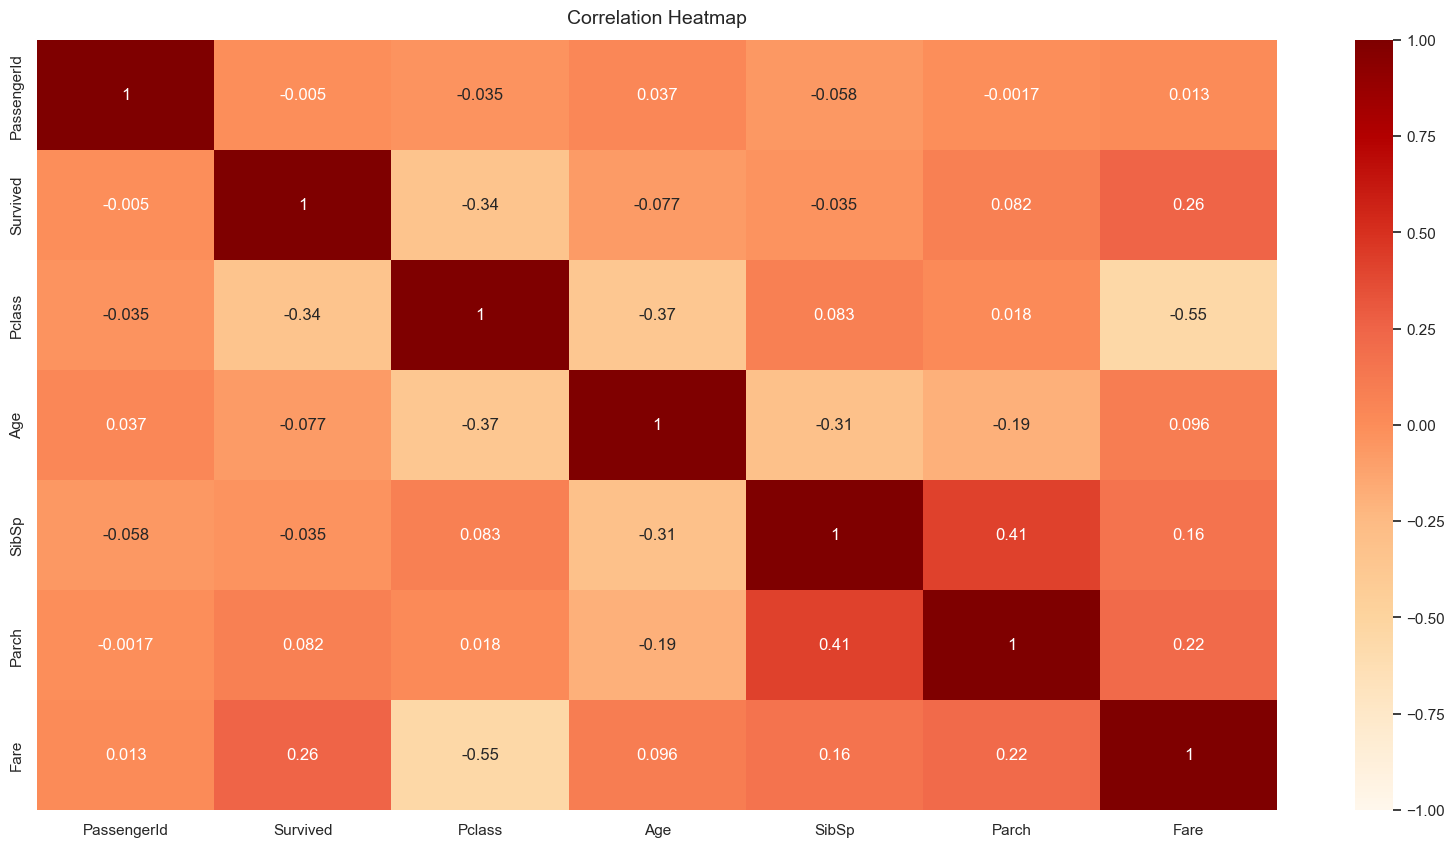

In [8]:
# Make a correlation matrix
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True,cmap="OrRd")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [9]:
# Cheking of any NUll values

data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

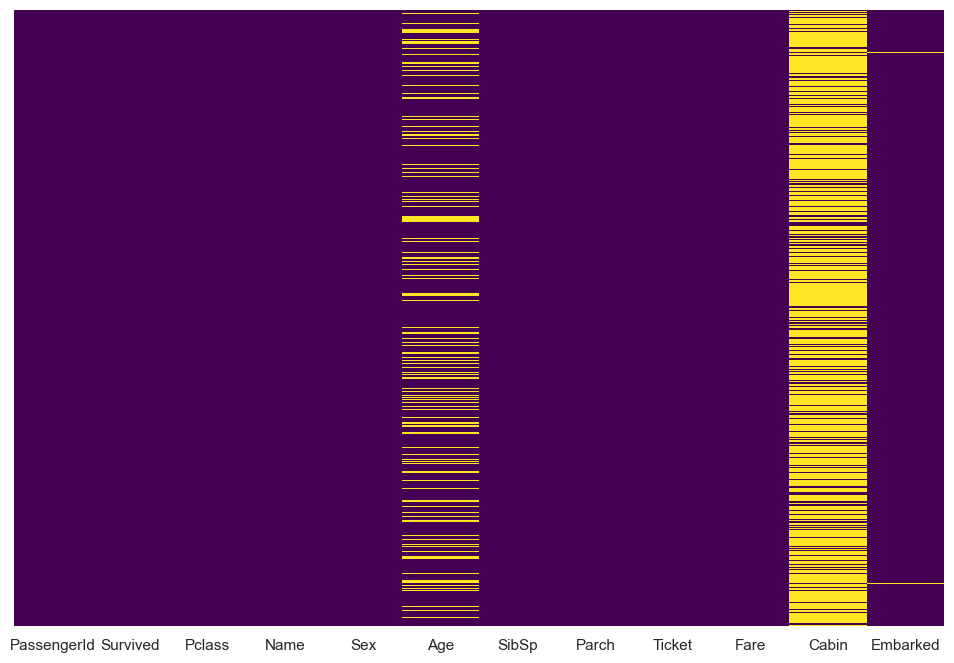

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

#### Step-3 Preprocessing of the data

In [11]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
Survived = data[data["Survived"]==1]
Non_Survived = data[data["Survived"]==0]

print("Survived : {} " .format(len(Survived)))
print("Non_Survived : {} " .format(len(Non_Survived)))

Survived : 342 
Non_Survived : 549 


In [13]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
data.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [16]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
data.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [19]:
data.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [20]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [21]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

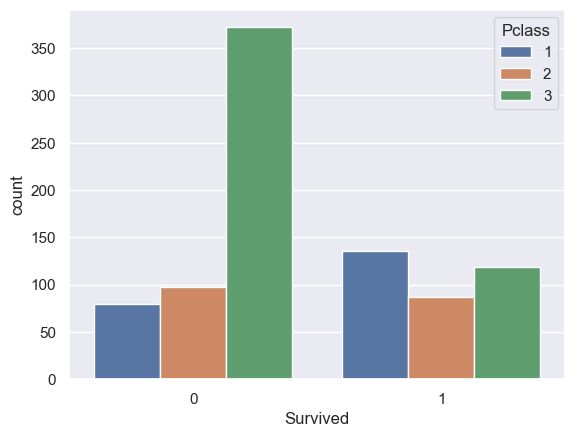

In [22]:

sns.countplot(x= data["Survived"] , hue = data["Pclass"])

<Axes: xlabel='Survived', ylabel='count'>

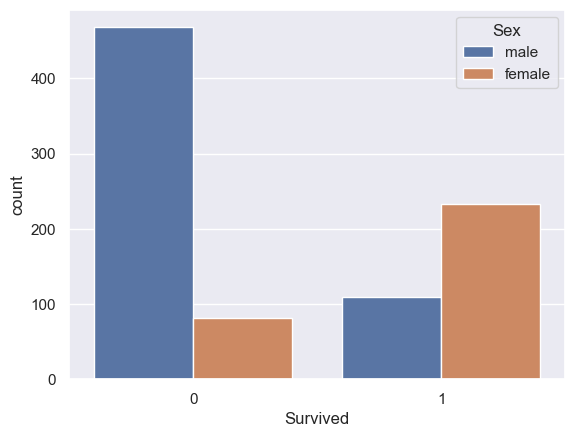

In [23]:
sns.countplot(x= data["Survived"] , hue = data["Sex"])

<Axes: xlabel='Survived', ylabel='count'>

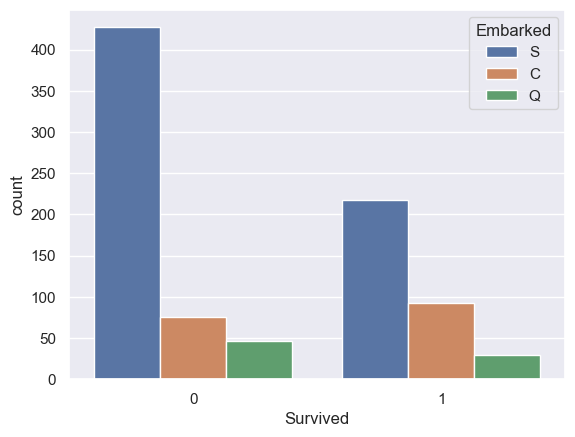

In [24]:
sns.countplot(x= data["Survived"] , hue = data["Embarked"])

<Axes: xlabel='Survived', ylabel='count'>

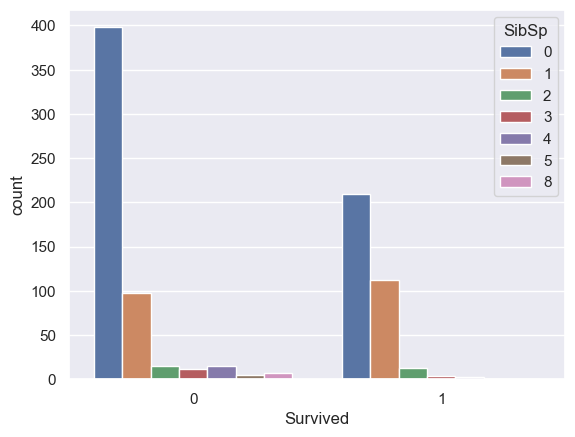

In [25]:
sns.countplot(x= data["Survived"] , hue = data["SibSp"])

<Axes: xlabel='Survived', ylabel='count'>

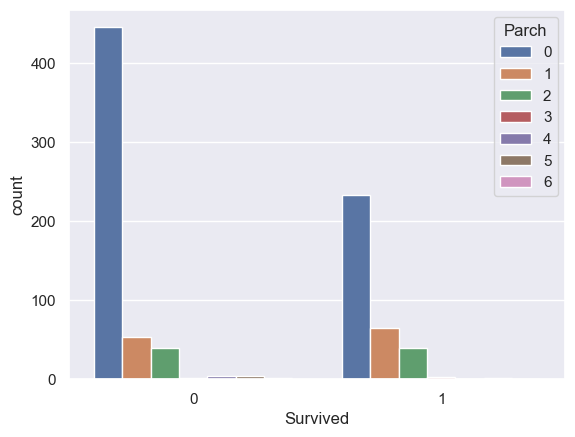

In [26]:
sns.countplot(x= data["Survived"] , hue = data["Parch"])

In [27]:
# Conversion of Categorical values into Numerical values

labelencoder = LabelEncoder() 
data['Sex'] = labelencoder.fit_transform(data['Sex'])

In [28]:
data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [29]:
#### replace the missing value with median

data['Age'].fillna(data['Age'].median(),inplace=True)

In [30]:
data1 = data.drop('Name',axis=1)

In [32]:
features = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
target = data["Survived"]

In [33]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [34]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Step-4: splitting the data into Train & Test

In [36]:
x=data[['Pclass', 'Sex']]
y=target

In [37]:
x_train , x_test, y_train, y_test = train_test_split(features,y, test_size= 0.2, random_state= 0)

from sklearn.impute import SimpleImputer # It is used to fill the missing values of the dataset.
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

#### Step-5: Training the Model

In [38]:
model = RandomForestClassifier()
model.fit(x_train_imputed, y_train)

RandomForestClassifier()

In [39]:
predictions = model.predict(x_test_imputed)

In [40]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score
acc = accuracy_score(y_test , predictions)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test , predictions)
print("The precision is {}".format(prec))

rec = recall_score(y_test , predictions)
print("The recall is {}".format(rec))

f1 = f1_score(y_test , predictions)
print("The F1-Score is {}".format(f1))

The accuracy is 0.8156424581005587
The precision is 0.7903225806451613
The recall is 0.7101449275362319
The F1-Score is 0.7480916030534351
